# Introduction

Thank you for taking our test! We look forward to reading your results.

- The test contains 2 sections. 
- You have 1 week to complete the test.
- We prefer if you use jupyter notebook to present your code and results. It is fine if you want to include additional libraries as separate python files. 
- If you don't have any python experience, you can use another language; we would highly appreciate that you also provide a document of the project in case we cannot properly run your code
- **For simple visualization, we recommend using matplotlib and seaborn tools. If you use other visualization packages, we would highly appreciate that you also provide a pdf or html of the project in case we cannot properly run your code**

## Task1 Analysis is based on: 
### (1) data quality check (2) relationship exploration (3) prediction model development/backtesting
**The objective of this task is to first identify relationships between Y and X1, X2, X3 then predict Y correspondingly.**

### Data Quality
The given data is "clean":
- **No duplicates detected**
- **No missing values detected**
- **No outliers detected** - Y from -1 to 1, X1/2/3 from -0.5 to 0.5. 


### Relationship between Y and X1, X2, X3. 
**(1) 20% in-sample data have Y=0.1, and all of these records has X1 fall in [-0.1, 0.1]** <br>
**(2) 58% in-sample data has Y equals to -X3**<br>
**(3) 21% in-sample data has Y equals to X1+X2+x3** <br>
**(4) 1% in-sample data has Y equals to X1-X2** <br>

The above relationships are obtained by:
- observed clear relationship in various charts 
- controlling variables: control two X variables except for one in order to isolate and identify the effect of that one variable to Y. Similarly, control one X variable. 

### Prediction model development/backtesting
The above relationships can be classified based on X1, X2 and X3. <br>
**(1) When absolute value of X1 smaller than 0.1, Y equals to 0.1** <br>
- Classification accuracy is 99.4% <br>

**When absolute X1 no smaller than 0.1:** <br>
**(2) When X1X2 < 0 and X1X3 > 0, Y equals to X1+X2+X3** - observed by 3D charting <br>
**(3) Only 1% insample data has Y=X1-X2, I decided to ignore the relationship** <br>
**(4) For the rest of the situations, Y equals to -X3** <br>
- Classification accuracy is 98.09% <br>

**In-sample prediction backtesting results are:** <br>
- R squared: 96.45%
- MAE: 0.0067
- MSE: 0.0030

Prediction results are saved as final_rst_answer.csv. 

## Task2 Analysis is based on: 
### (1) data quality check  (2) feature engineering (3) model/strategy development and (4) backtesting
**The objective of this alpha strategy is to build a monthly rebalanced factor weighted strategy using technical/fundamental signals.**

### Data Quality
The given data provides daily market/fundamental/technical data from 2010-01-04 to 2022-09-08, 300+ unique securities each day. But I decided to develop a monthly rebalanced strategy as I want to use the quarterly fundamental data.

Data cleaning - I prefer to make the process systematic. All analysis below is based on this principle. <br>
**Universe: the selected universe have daily 300 securities, filtered on marketcap and trading volume, started from 2010-01-04, ended on 2022-09-08.** <br>
- Market data (op, cp, adv and cap), Technical indicator and holding indicator: have similar daily coverage
- Financial indicator: solved quarterly releasing with missing data & delayed reporting issues<br>

**No duplicates detected, but there are missing values issue.**
- 2022-08-05 has no available market data, so I excluded this date
- Since there are less than 4% missing data, I decided to keep all records and use the same day sector average to fill missing values. 
Note: besides it, we could also choose to perform data interpolation, i.e., impute missing values with 0, median, mean, the nearby values (time series/cross cohorts), or based on research logic. 

**Outliers:** 
- I didn't observe significant return/fundamental jump/drop. If there are any, I would check the data via other resources to verify whether the jump/drop are valid, and would drop/fix the data record if the data is not valid. <br>

### Feature Engineering 
Start from the goal of my strategy, I developed signals (features) based on: <br>

**(1) Technical features:** <br>
- momentum, mean-revert trend, volatility, skewness (return)
- alternative ways to measure momentum and mean-revert like up and down days percentage, diff, etc.
- close price, historical price high/low/range/diff

**(2) Fundamental features:** <br>
- historical level, trend and acceleration
- net income gross, profit margin, pe/ps ratio derived from mktcap, netIncome and grosssales

Adjust market and sector impacts for these features and further perform normalization and neutralization based on needs. <br>
- I used linear regression to eliminate the market impacts (historical 1year beta) and sector impacts (dummy variables).
- Another way to adjust market and sector impacts can be: perform stepwise regression, adjust for market beta first then adjust for sector. 
   
Note: features have various windows like 1week, 1month, 6month and 1year. <br>


### Model/Strategy Development 
The strategy objective is to predict the forward month return for 300 securities, rebalance portfolio correspondingly. <br> 
Among all the developed signals, I first filtered signals with stronger correlations with forward return. Within the filtered signals, I explored various stats/ML models seeking for sustainable prediction power while avoiding overfitting. And eventually decided to use Ridge Regression, as I observed multicollinearity among the filtered signals and Ridge regression can shrink coefficients which reduces model complexity, prevent overfitting and improves model stability. <br>

### Backtesting

Overall, this factor weighted strategy has
- 1 simulated Sharpe Ratio, 20% Annualized Return
- Slightly negative Information Coefficient (IC) mean and ICInformationRatio but growing cumulative IC since 2019 indicates that it performs better recent years. Suggesting it correlates stronger with momentum in 2020, which makes sense as this is a monthly strategy. 
- I group stocks by quantile of factor values (alpha) then analyse the average forward return within each of the 5 groups. Good quantiles return are characterised by a monotonous relationship between the individual quantiles and forward returns. I would expect to see group 1 constantly perform better than other groups over the backtesting period, but didn't observe it. 
- According to the decay chart, the correlation between alpha and its lag over 4-8 month is around 0.3, a relatively high number, which suggests the strategy has mid-low frequency and could have high capacity. 

 <br>

### The strategy could be optimized, I would perform ...
**Strategy** <br>
This is a monthly factor weighted strategy, the low frequency highly restricted the way how I trained signals aggregation model, currently, there's overfitting issue. To solve this issue, I would want to train model on rolling data, either should I get longer data history, or I'd love to design a daily arb strategy, which can also better use the current historical 10+year daily data. 

**Data:** <br>
There's very limited fundamental data, I would like to include more fundamental data, or alternative data. 
    
**Model:** <br>
1. Instead of using the linear features, I could also perform PCA as noise filtering to capture the most significant variance. 
2. Within each type of features (i.e., return/price/fundamental), I could select the most representative ones for variable reduction and better avoid overfitting. 
3. I chose Ridge Regression now, but with more available data, I could also use non-linear models to better aggregate alphas and sustainably gain good prediction accuracy.
4. Add scenario analysis: I can perform scenario analysis based on economics understanding of the market, not only for robustness check, but also perform optimizations to the strategies. (incld. financial crisis, volatility levels, trading volume, institutional trading and business cycle or macro news releases) <br>
    

In [1]:
##### import the functions I used 
%run functions.ipynb

# Task 1

Given the below information
- X1, X2 and X3 are the predictors
- Y is the target variable

Identify how is Y related to X1, X2 and X3 and fill the Y cells from row 15,000 onwards

Please note that the relationship is **fully deterministic** but there is more than 1 relationship.

Output: 

Please provide the file ML_test1.csv with rows 1 to 19,998 and do not remove in-sample rows (which are from 1 to 14,999).
Also, explain the relationships between Y and X1, X2 and X3 in the notebook.

## Load Data

In [53]:
task1_data = pd.read_csv('./ML_test1.csv',index_col=None)
display(task1_data.head(2))
display(task1_data.tail(2))

,X1,X2,X3,Y
0,0.433278,-0.180904,-0.426411,0.614181
1,-0.461811,-0.204108,0.036119,-0.036119


,X1,X2,X3,Y
19993,0.001773,-0.234236,0.143920,nan
19994,-0.273236,0.052397,0.496212,nan


## Data Exploration

In [54]:
##### only Y variable has missing values
task1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      19995 non-null  float64
 1   X2      19995 non-null  float64
 2   X3      19995 non-null  float64
 3   Y       14998 non-null  float64
dtypes: float64(4)
memory usage: 625.0 KB


In [55]:
##### check duplicates - no duplicates detected
display('Number of records included: '+str(task1_data.shape[0]))
task1_data = task1_data.drop_duplicates()
display('Number of records included after drop duplicates: '+str(task1_data.shape[0]))


'Number of records included: 19995'

'Number of records included after drop duplicates: 19995'

In [56]:
##### check missing values - only Y variable has missing values - to be predict
##### Y variable has missing values from row 14998 to 19994
display(task1_data.shape)
display(task1_data.isnull().sum().to_frame().T) 

##### define train and test data 
train = task1_data.iloc[:19995 - 4997]
test = task1_data.iloc[19995 - 4997:]
##### no missing values for train data 
display(train.isnull().sum().to_frame().T)

(19995, 4)

,X1,X2,X3,Y
0,0,0,0,4997


,X1,X2,X3,Y
0,0,0,0,0


In [57]:
##### descriptive statistics of given data - all continuous data 
task1_data.describe(include='all')

,X1,X2,X3,Y
count,19995.000000,19995.000000,19995.000000,14998.000000
mean,-0.000960,0.002051,-0.000191,0.017811
std,0.287825,0.288636,0.289385,0.288890
min,-0.499993,-0.499913,-0.499972,-0.927212
25%,-0.247543,-0.245841,-0.250855,-0.202540
50%,-0.004666,0.001510,-0.002747,0.100000
75%,0.248101,0.253533,0.252823,0.193096
max,0.499999,0.499958,0.499931,0.969272


## Feature Engineering 
Exploring the relationships between Y and predictors

In [58]:
##### stats measurements of relationship between variables - corr matrix 
train.corr()

,X1,X2,X3,Y
X1,1.000000,-0.009829,-0.000100,0.459272
X2,-0.009829,1.000000,-0.011365,-0.289836
X3,-0.000100,-0.011365,1.000000,-0.344865
Y,0.459272,-0.289836,-0.344865,1.000000


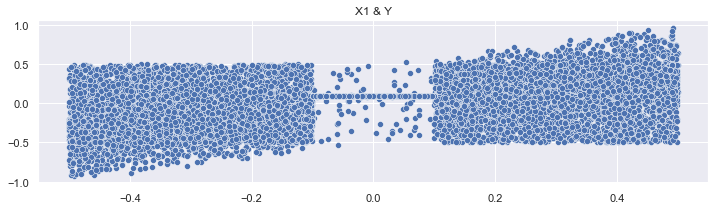

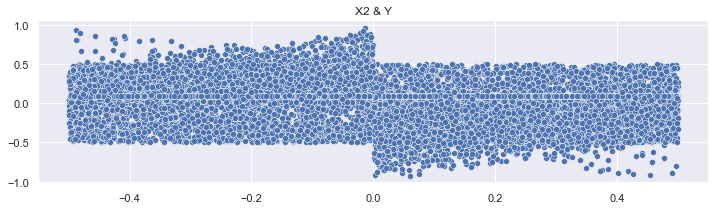

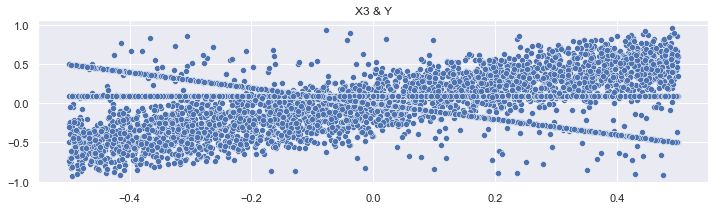

In [59]:
##### viz the relationship between variables - scatter plot
for col in ['X1', 'X2', 'X3']:
    visualization(df=train,x=col,y='Y',scatter=True,title=col+' & Y',rotation_angel=0)
    

### Relationship between Y and X1
**20% in-sample data has Y equal to 0.1, and all of these records has X1 fall in [-0.1,0.1]**

(2987, 4)

'19.92% of Y equal to 0.1'

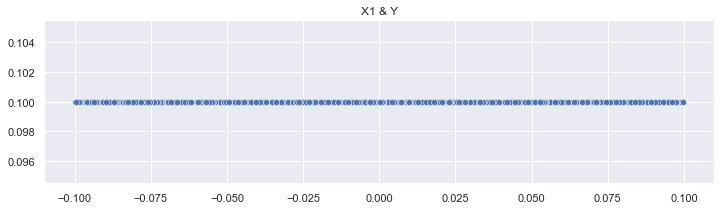

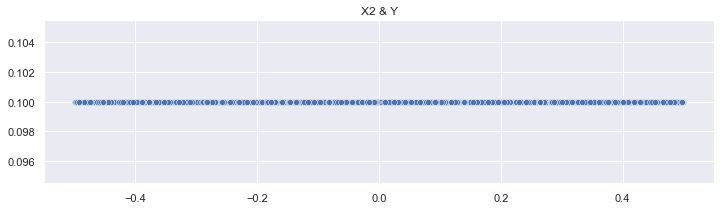

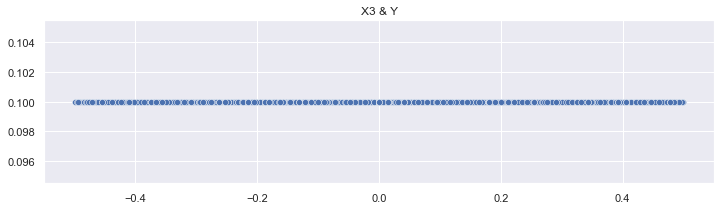

In [60]:
##### observed significant amount of Y equal to 0.1 across X1, X2, X3 (20%)
data1 = train.loc[train.Y == 0.1]
display(data1.shape)
display(str(round(100*data1.shape[0]/train.shape[0],2))+'% of Y equal to 0.1')
for col in ['X1', 'X2', 'X3']:
    visualization(df=data1,x=col,y='Y',scatter=True,title=col+' & Y',rotation_angel=0)
 

 **Upon removed Y equals 0.1 records, only 0.6% X1 remains in [-0.1, 0.1], so I decided to use abs(X1) smaller than 0.1 as a classification rule.**

'0.62% of X1 fall into [-0.1,0.1].'

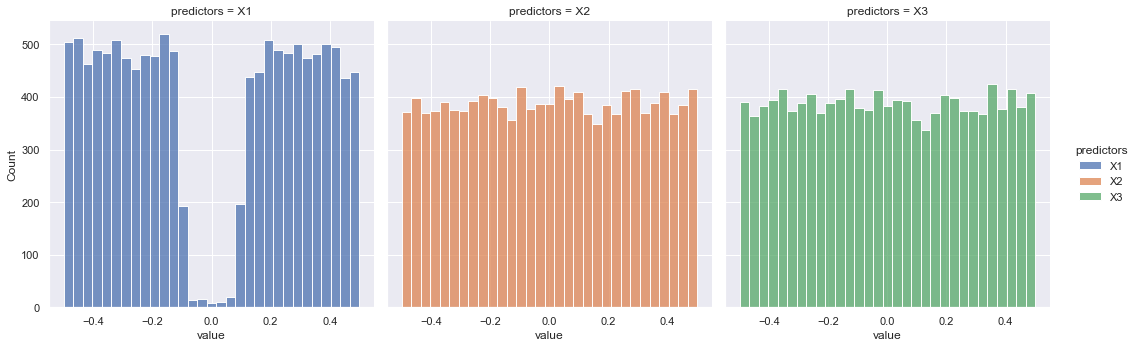

In [61]:
##### distribution of predictors 
tmp = train.loc[train.Y != 0.1].melt(id_vars=['Y'],var_name='predictors')
sns.displot(data=tmp,x='value',hue='predictors',col='predictors')
plt.plot()

##### 0.6% of X1 fall into [-0.1,0.1], I can move X1 0.1 closer to 0.
tmp = train.loc[train.Y != 0.1]
display(str(round(100*tmp.loc[abs(tmp.X1)<=0.1].shape[0]/tmp.shape[0],2))+'% of X1 fall into [-0.1,0.1].')


In [62]:
##### exclude records with abs(X1)<0.1
display(train.shape)
data1 = train.loc[abs(train.X1) < 0.1]
display(data1.shape)

(14998, 4)

(3061, 4)

### Relationship between Y and X2, X3
**58% in-sample data has Y equals to -X3** <br>
**21% in-sample data has Y equals to X1+X2+x3** <br> 
**1% in-sample data has Y equals to X1-X2** <BR>

In [63]:
##### Distinguish relationship between X3 and Y 
data = train.loc[abs(train.X1) >= 0.1].copy()

data.loc[:,'X3Ratio'] = data.X3/data.Y 
data.loc[:,'XAll'] = data.X1+data.X2+data.X3
data.loc[:,'X1-X2'] = data.X1-data.X2

##### Y = -X3 
data2 = data.loc[data.X3Ratio == -1]
##### Y = X1+X2+X3 
data3 = data.loc[(data.X3Ratio != -1) & ((data['XAll'] - data.Y) <=1e-6) ]
##### Y = X1-X2
data4 = data.loc[(data.X3Ratio != -1) & ((data['XAll'] - data.Y) >1e-6)  & ((data['X1-X2'] - data.Y) <=1e-6) ]

display(str(round(100*data1.shape[0]/train.shape[0],2))+'% insample data has Y equals to 0.1' )
display(str(round(100*data2.shape[0]/train.shape[0],2))+'% insample data has Y equals to -X3')
display(str(round(100*data3.shape[0]/train.shape[0],2))+'% insample data has Y equals to X1+X2+X3')
display(str(round(100*data4.shape[0]/train.shape[0],2))+'% insample data has Y equals to X1-X2')

'20.41% insample data has Y equals to 0.1'

'58.01% insample data has Y equals to -X3'

'20.76% insample data has Y equals to X1+X2+X3'

'0.82% insample data has Y equals to X1-X2'

**Relationships between Y and predictors when Y equals to -X3**

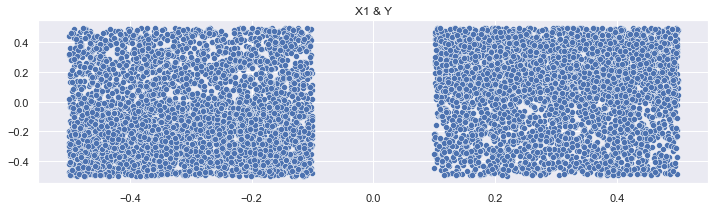

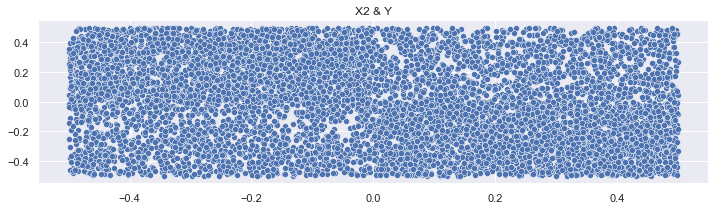

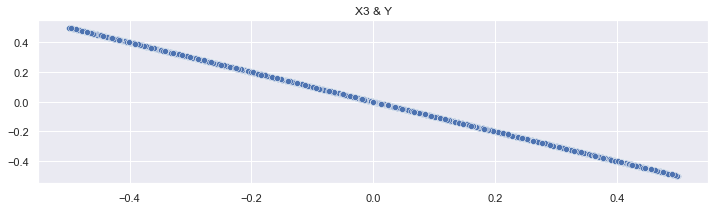

In [64]:
for col in ['X1', 'X2', 'X3']:
    visualization(df=data2,x=col,y='Y',scatter=True,title=col+' & Y',rotation_angel=0)


In [65]:
data2.corr()[['Y']]

,Y
X1,0.284117
X2,-0.231005
X3,-1.000000
Y,1.000000
X3Ratio,nan
XAll,-0.477320
X1-X2,0.426849


**Relationships between Y and predictors when Y equal to X1+X2+X3**

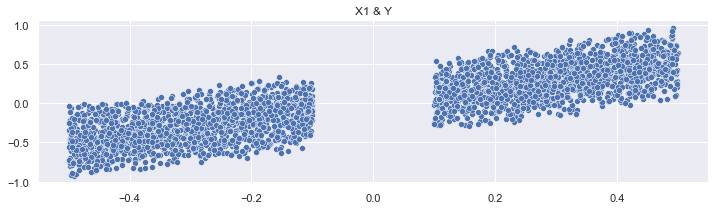

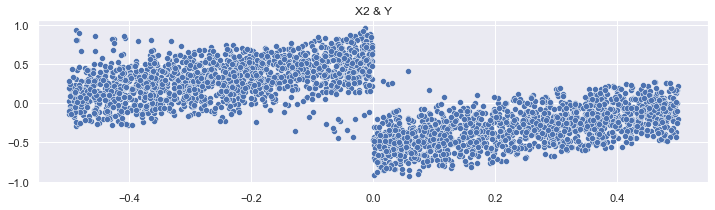

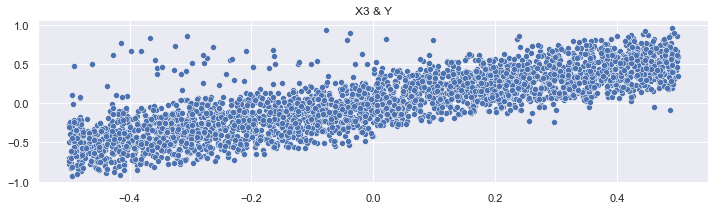

In [66]:
for col in ['X1', 'X2', 'X3']:
    visualization(df=data3,x=col,y='Y',scatter=True,title=col+' & Y',rotation_angel=0)


In [67]:
data3.corr()[['Y']]

,Y
X1,0.845662
X2,-0.505676
X3,0.827290
Y,1.000000
X3Ratio,-0.000475
XAll,0.940073
X1-X2,0.726167


**Relationships between Y and predictors when Y equal to X1-X2**

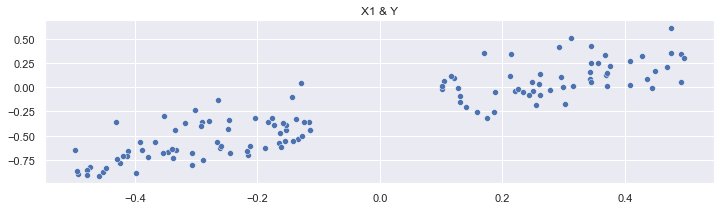

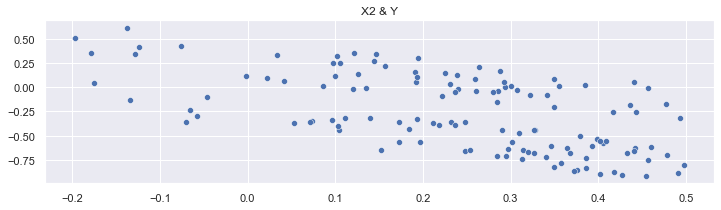

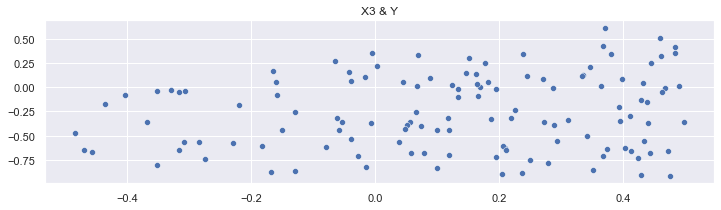

In [68]:
for col in ['X1', 'X2', 'X3']:
    visualization(df=data4,x=col,y='Y',scatter=True,title=col+' & Y',rotation_angel=0)


In [69]:
data4.corr()[['Y']]

,Y
X1,0.902854
X2,-0.599657
X3,0.158449
Y,1.000000
X3Ratio,0.085919
XAll,0.576546
X1-X2,1.000000


### Relationship Type Classification 

In [70]:
tmp = classify_data(df2=data2, df3=data3, df4=data4)
display(tmp.shape)
tmp.head()

(11937, 7)

,X1,X2,X3,type,X1X2,X1X3,X2X3
0,-0.461811,-0.204108,0.036119,1,0.094259,-0.016680,-0.007372
1,-0.451108,-0.151159,-0.007978,1,0.068189,0.003599,0.001206
2,-0.311116,-0.111921,-0.251479,1,0.034820,0.078239,0.028146
3,0.164241,-0.120218,-0.493017,1,-0.019745,-0.080973,0.059270
4,-0.275159,0.257689,0.015797,1,-0.070905,-0.004347,0.004071


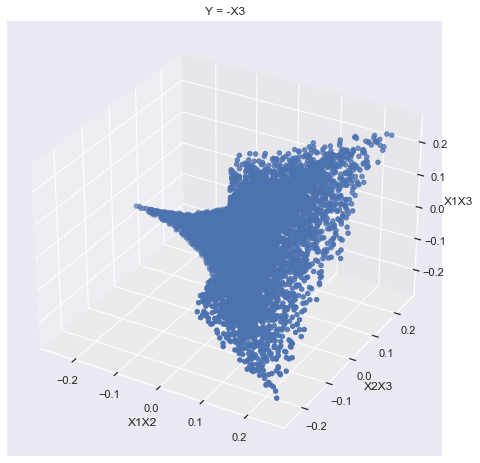

In [71]:
# %matplotlib notebook
visualization_3d(df=tmp.loc[tmp.type==1],x='X1X2',y='X2X3',z='X1X3',title='Y = -X3',
                xlabel='X1X2', ylabel='X2X3',zlabel='X1X3')

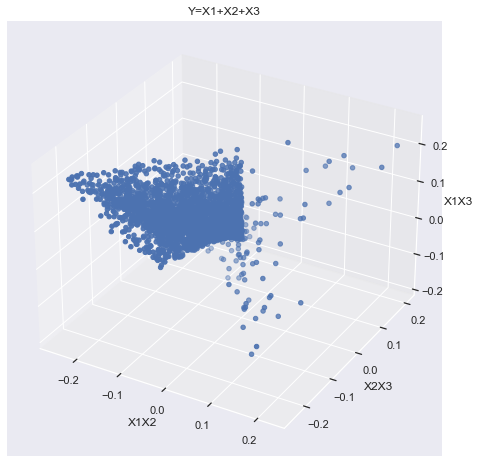

In [72]:

visualization_3d(df=tmp.loc[tmp.type==2],x='X1X2',y='X2X3',z='X1X3',title='Y=X1+X2+X3',
                xlabel='X1X2', ylabel='X2X3',zlabel='X1X3')

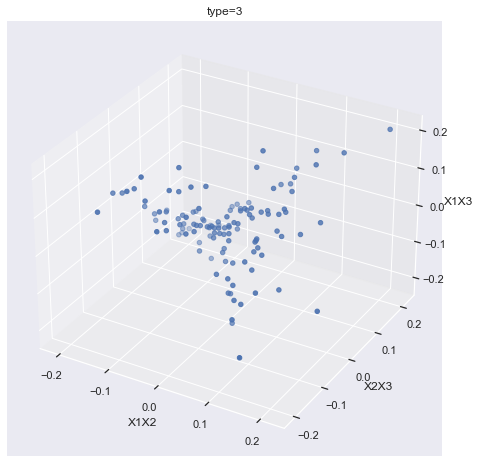

In [73]:

visualization_3d(df=tmp.loc[tmp.type==3],x='X1X2',y='X2X3',z='X1X3',title='type=3',
                xlabel='X1X2', ylabel='X2X3',zlabel='X1X3')

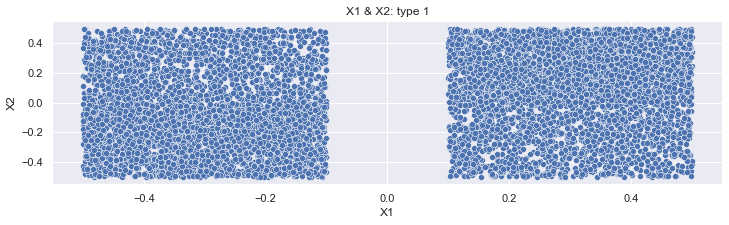

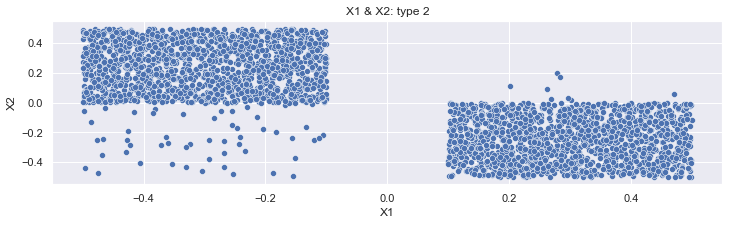

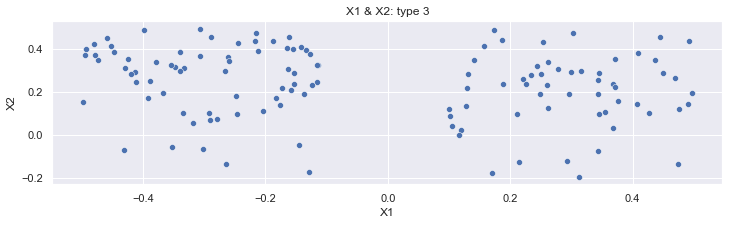

In [74]:
for n in [1,2,3]:
    visualization(df=tmp.loc[tmp.type==n],x='X1',y='X2',scatter=True,title='X1 & X2: type '+str(n),rotation_angel=0,
                 xlabel='X1', ylabel='X2')

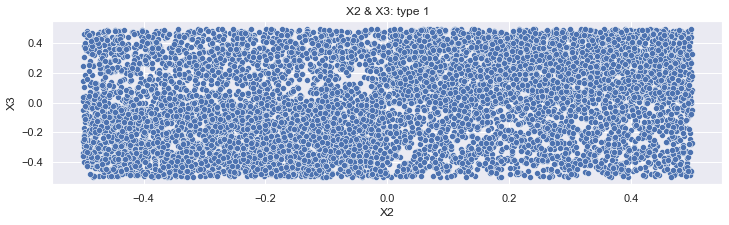

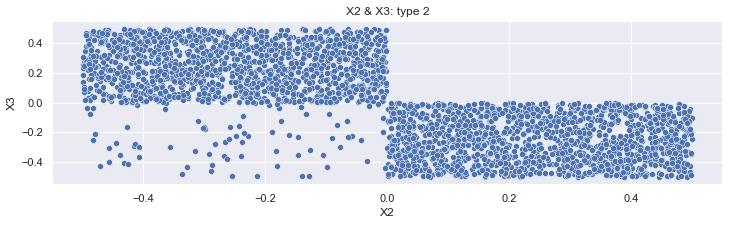

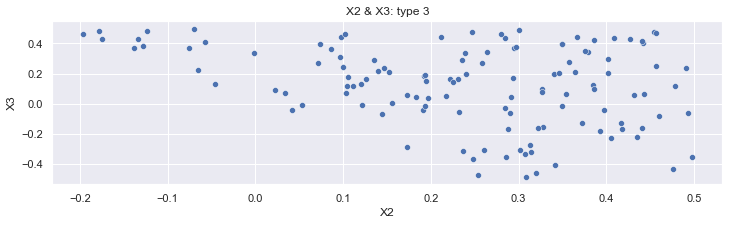

In [75]:
for n in [1,2,3]:
    visualization(df=tmp.loc[tmp.type==n],x='X2',y='X3',scatter=True,title='X2 & X3: type '+str(n),rotation_angel=0,
                 xlabel='X2', ylabel='X3')

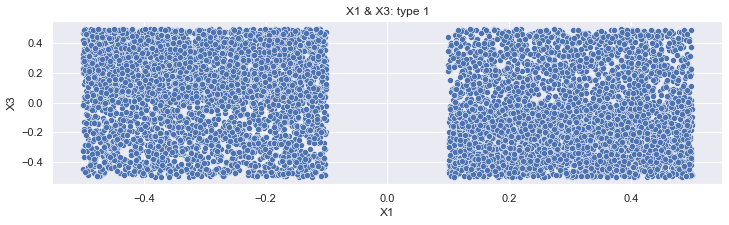

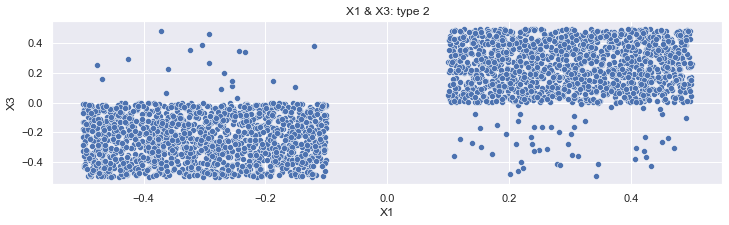

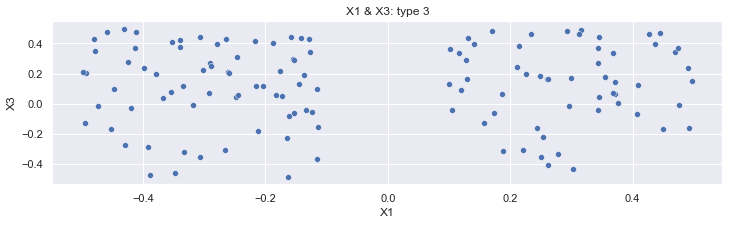

In [76]:
for n in [1,2,3]:
    visualization(df=tmp.loc[tmp.type==n],x='X1',y='X3',scatter=True,title='X1 & X3: type '+str(n),rotation_angel=0,
                 xlabel='X1', ylabel='X3')

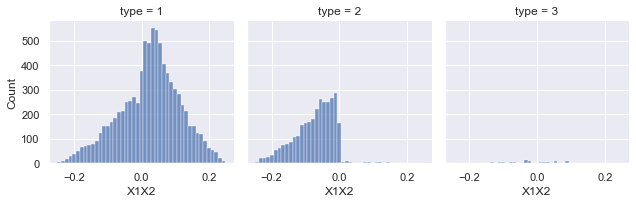

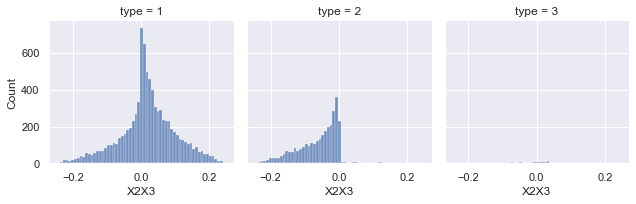

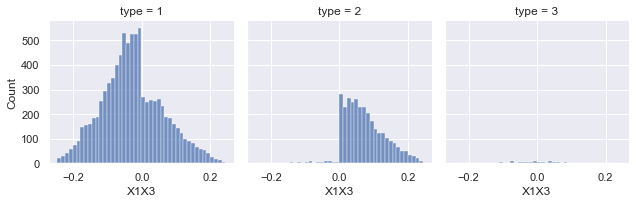

In [77]:
for col in ['X1X2','X2X3','X1X3']:
    sns.displot(data=tmp,x=col,col='type',height=3)

### Distinguish these relashionshipins base on X1, X2, X3

**Only 1% insample data has Y=X1-X2, I decided to ignore the relationship** <br>
**When X1X2 < 0 and X1X3 > 0, Y equals to X1+X2+X3** <br>
**For the rest of the situations, Y equals to -X3**

In [78]:
##### Classification accuracy 
classify_accuracy = classification_accuracy(df=tmp)
display('Relationship classification accuracy is: '+str(round(100*classify_accuracy,2))+'%')

'Relationship classification accuracy is: 98.09%'

## Prediction Model
**When abs(X1) smaller than 0.1, Y equals 0.1** <br>
**When abs(X1) no smaller than 0.1** <br>
- Y equals to -X3
- Y equals to X1+X2+X3

**In-sample Backtesting**

In [79]:
train_pred = pred_model(df=train)
display(train_pred.shape)
display(train_pred.head(2))

(14998, 4)

,X1,X2,X3,Y
0,0.433278,-0.180904,-0.426411,0.426411
1,-0.461811,-0.204108,0.036119,-0.036119


In [80]:
print("R^2 : ", metrics.r2_score(train.Y, train_pred.Y))
print("MAE :", metrics.mean_absolute_error(train.Y, train_pred.Y))
print("MSE:",metrics.mean_squared_error(train.Y, train_pred.Y))

R^2 :  0.9645002430636367
MAE : 0.006788023289105216
MSE: 0.002962527751338772


**Out-of-sample Prediction**

In [81]:
test_pred = pred_model(df=test)
display(test_pred.shape)
display(test_pred.head(2))

(4997, 4)

,X1,X2,X3,Y
14998,0.262342,-0.048945,-0.034483,0.034483
14999,0.064817,0.083562,-0.196660,0.100000


In [82]:
##### task provided original data 
display(task1_data.shape)
display(task1_data.tail())

(19995, 4)

,X1,X2,X3,Y
19990,-0.096346,0.473540,0.335788,nan
19991,0.446658,-0.099377,0.047888,nan
19992,-0.438806,0.348308,0.090290,nan
19993,0.001773,-0.234236,0.143920,nan
19994,-0.273236,0.052397,0.496212,nan


In [83]:
##### final results 
final_rst = pd.concat([train, test_pred])
display(final_rst.shape)
display(final_rst.head(2))
display(final_rst.tail(2))

(19995, 4)

,X1,X2,X3,Y
0,0.433278,-0.180904,-0.426411,0.614181
1,-0.461811,-0.204108,0.036119,-0.036119


,X1,X2,X3,Y
19993,0.001773,-0.234236,0.143920,0.100000
19994,-0.273236,0.052397,0.496212,-0.496212


In [84]:
#final_rst.to_csv('./ML_test1_answer.csv')

# Task 2

Given below information
- Market data: We defined a tradable universe (if no market cap info, not in the universe). You have below information within the defined universe:
    - openadj/closeadj are open/close price adjusted for corporate actions
    - adv: average trading volume in dollars 
    - market cap: total market value in million dollars
    - sector info: the sector classification of the instruments in this universe

- Other Predictors: they might have different update frequency. 
    - technical indicator: this is an indicator we derived from market data. You can also add your own predictors based on above market data. 
    - holding indicator: this is an indicator in dollars showing how much the stock is held by institutional investors. 
    - 2 finanical indicators: we also provide you the Net Income and Sales in million dollars.
         - The FiscalYear/FiscalQuarter are indicated by the financial report, i.e. not necessarily consistent with calendar year/quarter. 
         - The Net Income is cumulative quarterly amount per fiscal year. i.e., Q2 amount is given as Q1 + Q2; Q4 amount is given as Q1 + Q2 + Q3 + Q4.
         - The Sales is noncumulative quarterly amount.

Please note: The predictors are available before today market open. The market data will be available after today market close.


We expect you to 
1. **Process the data:** identify potential data issues and clean the data accordingly
2. **Describe the data:** you should try to understand the data
3. **Design a prediction model:** using the data given above, you should try to predict future stock returns (any forward window that you find reasonable is fine). It is fine to include attempts that led nowhere. Importantly, you should explain each step clearly. 
4. **Provide us with a final conclusion:** you should include statistics, a summary of your attempts and potential future ideas.


## Evaluation

You will be evaluated based on the following criteria:

- 20% - **Code quality**
- 20% - **Presentation of results and explanations.** We should be able to understand what you did without reading the code.
- 20% - **Data analysis skills**
- 10% - **Creativity**
- 10% - **Prediction accuracy**

Good luck!

### Load Data

In [2]:
'''
Raw predictors
'''
financial_indicator = pd.read_csv('./financial_indicator.csv', index_col=None)
technical_indicator = pd.read_csv('./technical_indicator.csv', index_col=0)
holding_indicator = pd.read_csv('./holding_indicator.csv', index_col=0)
'''
Market data
'''
op = pd.read_csv('./openadj.csv',index_col=0, low_memory=False)
cp = pd.read_csv('./closeadj.csv',index_col=0, low_memory=False) 
adv = pd.read_csv('./adv.csv',index_col=0, low_memory=False)
cap = pd.read_csv('./market_cap.csv',index_col=0, low_memory=False)
sector = pd.read_csv('./sectors.csv', index_col=0, low_memory=False)


In [6]:
sector.head()

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,822,823,824
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,Information Technology,Consumer Discretionary,Health Care,NaN,NaN,Health Care,Materials,Industrials,...,NaN,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,Information Technology,Consumer Discretionary,Health Care,NaN,NaN,Health Care,Materials,Industrials,...,NaN,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,Information Technology,Consumer Discretionary,Health Care,NaN,NaN,Health Care,Materials,Industrials,...,NaN,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,Information Technology,Consumer Discretionary,Health Care,NaN,NaN,Health Care,Materials,Industrials,...,NaN,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration

- Universe: based on market cap data, the available universe have daily 300+ securities, started from 2010-01-04, ended on 2022-09-08. With one missing date 2022-08-05. 
- Market data: op, cp, adv and cap have similar daily coverage
- Technical indicator and holding indicator: 
- Financial indicator: quarterly releasing with missing data & delayed reporting issues 

In [7]:
start_date = cap.index.min()
end_date = cap.index[:-1].max()   

cap = feature_cleaning(df=cap, start_date=start_date, end_date=end_date)
op = feature_cleaning(df=op, start_date=start_date, end_date=end_date)
cp = feature_cleaning(df=cp, start_date=start_date, end_date=end_date)
adv = feature_cleaning(df=adv, start_date=start_date, end_date=end_date)
sector = feature_cleaning(df=sector, start_date=start_date, end_date=end_date)

technical_indicator = feature_cleaning(df=technical_indicator, start_date=start_date, end_date=end_date)
holding_indicator = feature_cleaning(df=holding_indicator, start_date=start_date, end_date=end_date)

In [8]:
technical_indicator.head(2)

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,822,823,824
2010-01-04,NaN,NaN,0.696224,0.488569,0.130932,NaN,NaN,0.179945,0.207309,0.825251,...,NaN,0.259092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,0.697610,0.487357,0.132837,NaN,NaN,0.182369,0.207655,0.824385,...,NaN,0.259958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'mktcap start date: 2010-01-04 00:00:00'

'mktcap end date: 2022-09-08 00:00:00'

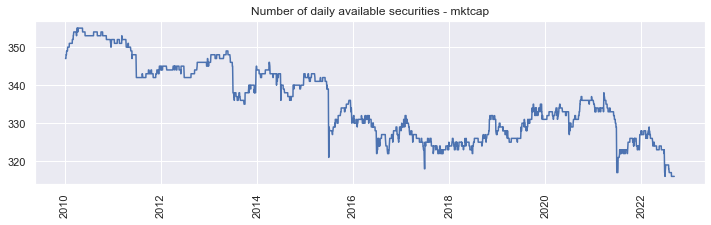

In [87]:
display_features(df=cap, feature='mktcap')

'adj open price start date: 2010-01-04 00:00:00'

'adj open price end date: 2022-09-08 00:00:00'

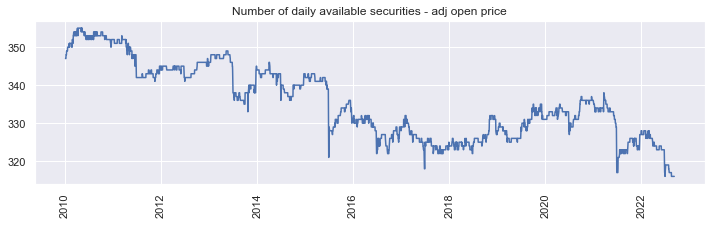

In [88]:
display_features(df=op, feature='adj open price')

'adj close price start date: 2010-01-04 00:00:00'

'adj close price end date: 2022-09-08 00:00:00'

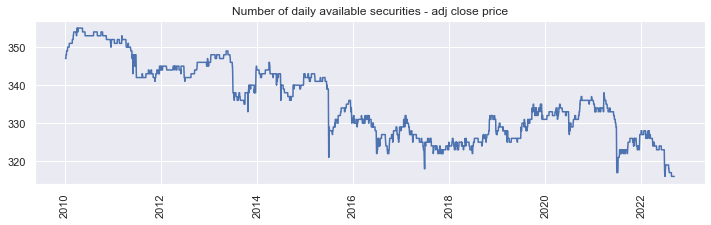

In [89]:
display_features(df=cp, feature='adj close price')

'average trading volume start date: 2010-01-04 00:00:00'

'average trading volume end date: 2022-09-08 00:00:00'

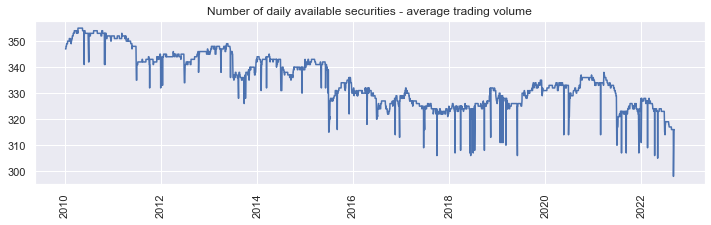

In [90]:
display_features(df=adv, feature='average trading volume')

'sector start date: 2010-01-04 00:00:00'

'sector end date: 2022-09-08 00:00:00'

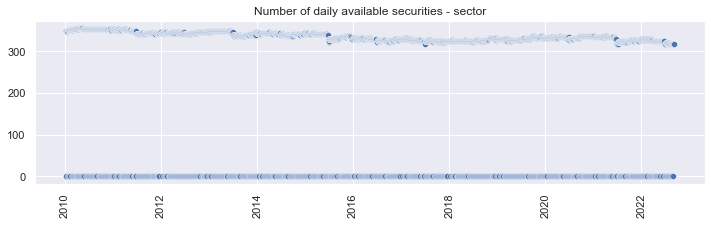

In [91]:
display_features(df=sector, feature='sector',scatter=True)

In [92]:
##### filling missing values 
sector = sector.fillna(method="bfill").fillna(method="ffill")

display(sector.head(2))
display(sector.tail(2))

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,822,823,824
2010-01-04,Industrials,Industrials,Information Technology,Consumer Discretionary,Health Care,Information Technology,Information Technology,Health Care,Materials,Industrials,...,Consumer Discretionary,Information Technology,Health Care,Health Care,Financials,Health Care,Materials,Materials,Industrials,Information Technology
2010-01-05,Industrials,Industrials,Information Technology,Consumer Discretionary,Health Care,Information Technology,Information Technology,Health Care,Materials,Industrials,...,Consumer Discretionary,Information Technology,Health Care,Health Care,Financials,Health Care,Materials,Materials,Industrials,Information Technology


,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,822,823,824
2022-09-07,Industrials,Industrials,Information Technology,Consumer Discretionary,Health Care,Information Technology,Information Technology,Health Care,Materials,Industrials,...,Consumer Discretionary,Information Technology,Health Care,Health Care,Financials,Health Care,Materials,Materials,Industrials,Information Technology
2022-09-08,Industrials,Industrials,Information Technology,Consumer Discretionary,Health Care,Information Technology,Information Technology,Health Care,Materials,Industrials,...,Consumer Discretionary,Information Technology,Health Care,Health Care,Financials,Health Care,Materials,Materials,Industrials,Information Technology


In [93]:
##### 11 sectors covered 
unique_sectors = []
for col in sector.columns:
    sec = list(sector[col].unique())
    unique_sectors += sec
set(unique_sectors)

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

'technical indicator start date: 2010-01-04 00:00:00'

'technical indicator end date: 2022-09-08 00:00:00'

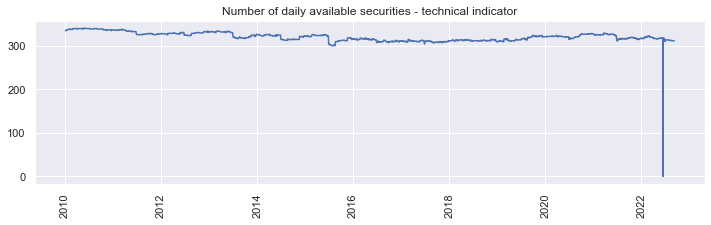

In [94]:
# %matplotlib notebook
display_features(df=technical_indicator, feature='technical indicator')

In [9]:
financial_indicator.head()

,symbol,Date,FiscalQuarter,FiscalYear,NetIncome,GrossSales
0,666,2010-01-06,1.000000,2010,-19.000000,996.533106
1,816,2010-01-12,3.000000,2010,46094.097656,76823.496093
2,634,2010-01-20,4.000000,2009,2389.096924,3981.828207
3,344,2010-01-21,4.000000,2009,3534.000000,5890.000000
4,619,2010-01-21,4.000000,2009,-60.200001,145.251285


In [10]:
##### clean financial data 
financial_indicator = financial_indicator.copy()
financial_indicator.Date = pd.to_datetime(financial_indicator.Date)
financial_indicator = financial_indicator.loc[(financial_indicator.Date >= start_date) & (financial_indicator.Date <= end_date) & (~financial_indicator.Date.isin(['2022-08-05']))]
    
financial_indicator.symbol = financial_indicator.symbol.astype(str)
financial_indicator.FiscalQuarter = financial_indicator.FiscalQuarter.astype(int)

financial_indicator.head()

,symbol,Date,FiscalQuarter,FiscalYear,NetIncome,GrossSales
0,666,2010-01-06,1,2010,-19.000000,996.533106
1,816,2010-01-12,3,2010,46094.097656,76823.496093
2,634,2010-01-20,4,2009,2389.096924,3981.828207
3,344,2010-01-21,4,2009,3534.000000,5890.000000
4,619,2010-01-21,4,2009,-60.200001,145.251285


'300 securities with the largest mktcap and good trading volume start date: 2010-01-04 00:00:00'

'300 securities with the largest mktcap and good trading volume end date: 2022-09-08 00:00:00'

/var/folders/vr/gh7h8yj930n551k6clbz2tp00000gn/T/ipykernel_90747/1009516794.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=x,y=y,data=df,palette=cust_col)


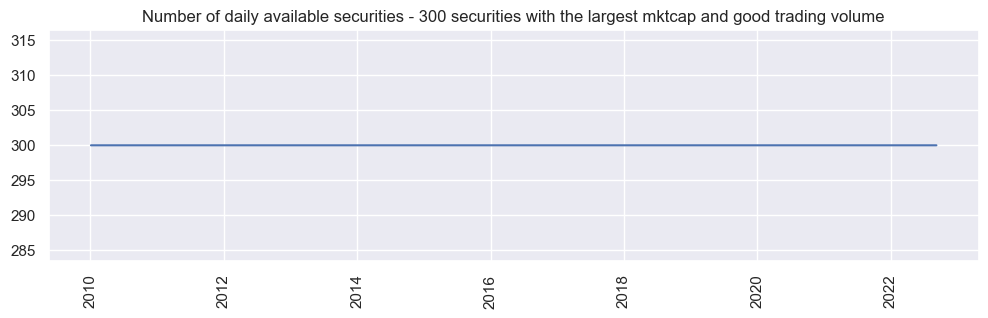

In [12]:
##### select daily 300 securities with top mktcap/trading vol as universe
top300 = universe_selection(df=cap,df2=adv)    
display_features(df=top300, feature='300 securities with the largest mktcap and good trading volume')  
    
   

## Feature Engineering 
Prep signals based on (1) Technical features and (2) Fundamental features

In [13]:
##### create a dataframe indication whether the stocks are included in the daily 300 universe
tradable = whether_in_universe(df=top300)
display(tradable.shape)
display(tradable.head(2))

##### 2022-08-05 - no securities in universe - delete 

(3166, 825)

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,822,823,824
2010-01-04,0,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2010-01-05,0,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


'Universe: 300 securities with the largest mktcap and good liquidity start date: 2010-01-04 00:00:00'

'Universe: 300 securities with the largest mktcap and good liquidity end date: 2022-09-08 00:00:00'

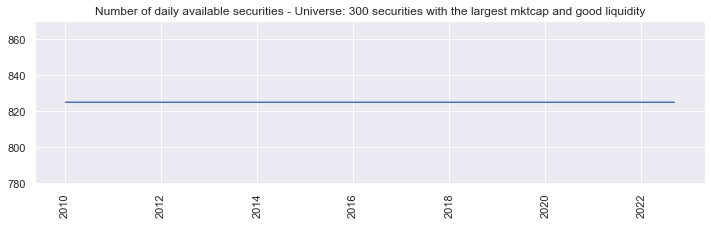

In [98]:
display_features(df=tradable, feature='Universe: 300 securities with the largest mktcap and good liquidity')  


In [18]:
##### universe indicator 
univ = tradable.reset_index().rename(columns={'index':'date'}).melt(id_vars='date').set_index(['date','variable'])
univ = univ.loc[univ.value == 1]
univ.head(2)

,,value
date,variable,
2013-12-11,1,1
2013-12-12,1,1


In [15]:
##### clean financial features 
financial_indicator['QuarterNum'] = (financial_indicator['FiscalYear'] * 4 + financial_indicator['FiscalQuarter']).apply(int)

sales_ttm_0 = pd.DataFrame(index=cap.index, columns=cap.columns)
sales_ttm_4= pd.DataFrame(index=cap.index, columns=cap.columns)

ni_ttm_0 = pd.DataFrame(index=cap.index, columns=cap.columns)
ni_ttm_4 = pd.DataFrame(index=cap.index, columns=cap.columns)


for symbol in cap.columns:    
    report_dates = fiscal_report_dates(financial=financial_indicator,symbol=symbol)
    
    for report_date in report_dates:
        sales_ttm_0.loc[report_date, symbol] = get_ttm_gross_sales(financial_indicator, report_date, symbol, 0)
        sales_ttm_4.loc[report_date, symbol] = get_ttm_gross_sales(financial_indicator, report_date, symbol, 4)
        
        ni_ttm_0.loc[report_date, symbol] = get_ttm_net_income(financial_indicator, report_date, symbol, 0)
        ni_ttm_4.loc[report_date, symbol] = get_ttm_net_income(financial_indicator, report_date, symbol, 4)

sales_ttm_0 = sales_ttm_0.fillna(method='ffill')
sales_ttm_4 = sales_ttm_4.fillna(method='ffill')
        
ni_ttm_0 = ni_ttm_0.fillna(method='ffill')
ni_ttm_4 = ni_ttm_4.fillna(method='ffill')

net_income_growth = (ni_ttm_0 - ni_ttm_4) / abs(ni_ttm_4)
profit_margin = ni_ttm_0 / sales_ttm_0
pe_ratio = cap / ni_ttm_0
ps_ratio = cap / sales_ttm_0


In [16]:
##### combine all raw features in one table 
raw_features = raw_features_df()

##### Missing Values: 
### Fill all missing values industry mean 
features_clean = fill_missing_values(df=raw_features)

display(features_clean.shape)
display(features_clean.tail(2))

##### filled nan features 
adv_clean = features_clean[['adv']].reset_index().pivot(index='date',columns='variable',values='adv')
cap_clean = features_clean[['cap']].reset_index().pivot(index='date',columns='variable',values='cap')

(2611950, 11)

sector  cp  op  adv  cap  holding_indicator  \
date       variable                                               
2022-09-08 98          NaN NaN NaN  NaN  NaN                NaN   
           99          NaN NaN NaN  NaN  NaN                NaN   

                     technical_indicator  net_income_growth  profit_margin  \
date       variable                                                          
2022-09-08 98                        NaN          -5.882353      -0.004004   
           99                        NaN          -0.447887       0.010615   

                     pe_ratio  ps_ratio  
date       variable                      
2022-09-08 98             NaN       NaN  
           99             NaN       NaN

In [19]:
##### get signals 
signals = get_signals(df=cp,features_clean=features_clean)
signals_in_univ = signals.loc[signals.index.isin(univ.index)]
fwd_rtn_20 = cp.pct_change(20).shift(-1)

display(signals.shape)
display(signals.tail(2))

##### get alpha 
alpha = get_alpha(df=signals_in_univ,signals=signals,isfilter=False)

(2611950, 38)

fwdrtn  net_income_growth  profit_margin  pe_ratio  \
date       variable                                                        
2022-09-08 98       0.029128          -5.882353      -0.004004       NaN   
           99            NaN          -0.447887       0.010615       NaN   

                     ps_ratio  technical_indicator    rtn_1w   rtn_1m  \
date       variable                                                     
2022-09-08 98             NaN                  NaN -0.007237 0.006820   
           99             NaN                  NaN -0.001199 0.002990   

                      rtn_6m    rtn_1y  ...  adv_z_6m  adv_z_1y  adv_1w  \
date       variable                     ...                               
2022-09-08 98       0.001786 -0.001034  ...       NaN       NaN     NaN   
           99       0.000546 -0.001036  ...       NaN       NaN     NaN   

                     adv_1m  adv_6m  adv_1y  cap_z_1w  cap_z_1m  cap_z_6m  \
date       variable                                                         
2022-09-08 98           NaN     NaN     NaN       NaN       NaN       NaN   
           99           NaN     NaN     NaN       NaN       NaN       NaN   

                     cap_z_1y  
date       variable            
2022-09-08 98             NaN  
           99             NaN  

[2 rows x 38 columns]

In [20]:
##### using 2012-2022 data as I used historical 1y beta to adjust market impacts 
alpha = clean_backtestinput_format(df=alpha,start_date=pd.to_datetime('2012-01-04'),end_date=pd.to_datetime('2022-09-07'))
tradable = clean_backtestinput_format(df=tradable,start_date=pd.to_datetime('2012-01-04'),end_date=pd.to_datetime('2022-09-07'))
fwd_rtn = clean_backtestinput_format(df=fwd_rtn_20,start_date=pd.to_datetime('2012-01-04'),end_date=pd.to_datetime('2022-09-07'),isfwd=True)

display(fwd_rtn.shape)
display(alpha.shape)
display(tradable.shape)

(2662, 825)

(2662, 825)

(2662, 825)

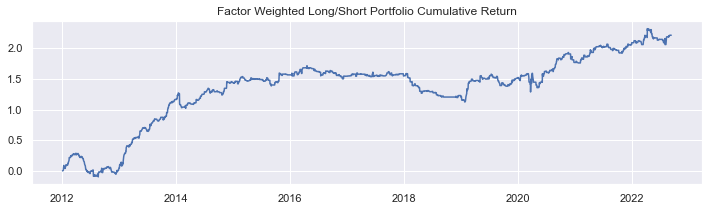

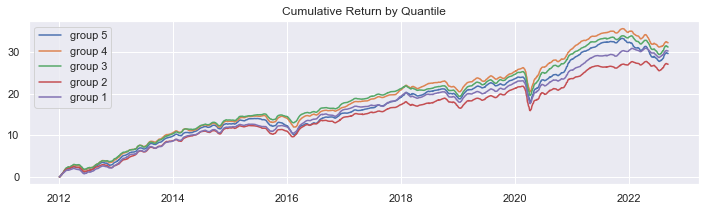

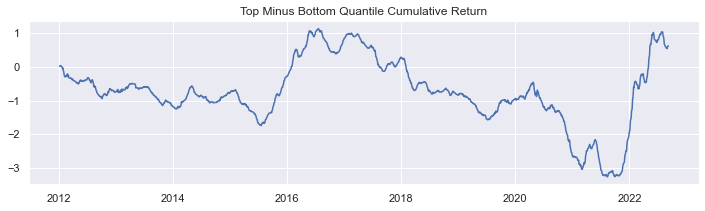

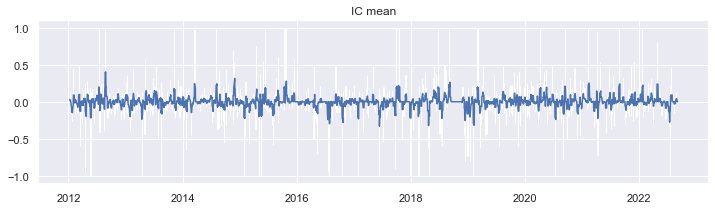

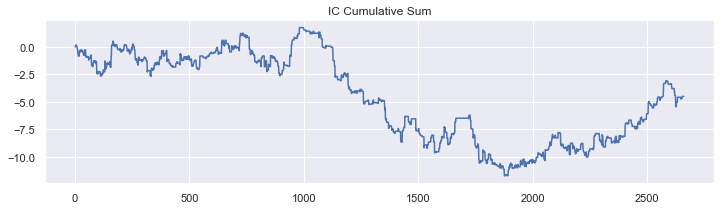

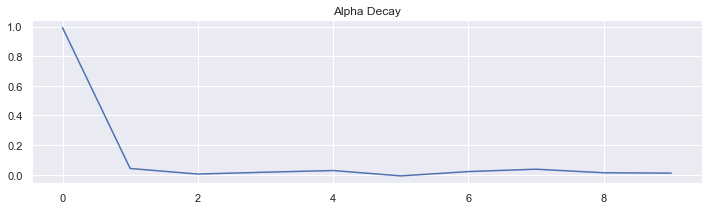

{'IC mean': -0.0016953982337186337, 'IC std': 0.17158432054171646, 'ICIR': -0.1562298915964729, 't-stats mean': 0.1169622357005879, 'Factor Portfolio Return': 0.20778432153437956, 'Factor Portfolio Sharpe Ratio': 0.8976165201503367, 'AnnualReturn': 0.20778432153437956}


In [104]:
##### Backtesting 
sfa = SingleFactorAnalysis(forward_ret=fwd_rtn,
                           alpha_df=alpha,
                           tradable_df=tradable,
                           freq=250
                          )
sfa.Statistics()
sfa.PlotResult()